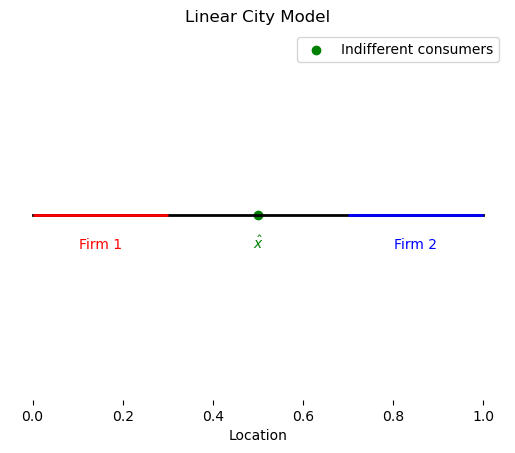

In [279]:
import matplotlib.pyplot as plt

a = 0
b = 0.3
x = 0.5  # pont where the consumer is indifferent between buying from the two firms

# Plotting the linear city
x_vals = [0, a, x, 1 - b, 1]
y_vals = [0, 0, 0, 0, 0]  # Setting y-coordinates to zero for all points
plt.plot(x_vals, y_vals, color='black', linewidth=2)

# Marking the firm locations as intervals
plt.hlines(y=0, xmin=a, xmax=0.3, color='red', linewidth=2)
plt.hlines(y=0, xmin=1 - b, xmax=1, color='blue', linewidth=2)
plt.annotate('Firm 1', (a, 0), xytext=(0.15, -0.01), ha='center', color='red')
plt.annotate('Firm 2', (1 - b, 0), xytext=(0.85, -0.01), ha='center', color='blue')

# Marking the new point
plt.scatter(x, 0, color='green', label='Indifferent consumers')
plt.annotate(rf"$\hat{{x}}$", (x, 0), xytext=(x, -0.01), ha='center', color='green')

# Setting plot properties
plt.xlabel('Location')
plt.title('Linear City Model')
plt.legend()

# Removing the y-axis ticks and labels
plt.yticks([])
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Display the plot
plt.show()

In [280]:
from sympy import symbols, Eq, solve

# Define the variables and parameters
x = symbols('x')
r, t, p_1, p_2, = symbols('r t p_1 p_2')

# Define the utility functions
V_1 = r - t * x**2 - p_1
V_2 = r - t * (x - 1)**2 - p_2

# Set V_1 equal to V_2 and solve for x
equation = Eq(V_1, V_2)
solution = solve(equation, x)

x_hat = solution[0]  # Get the first solution

# Print the result
print(f"The location x_hat where consumers are indifferent is: {x_hat}")


The location x_hat where consumers are indifferent is: (-p_1 + p_2 + t)/(2*t)


In [281]:
print(f"Demand 1 is hereby: {x_hat}")
print(f"Demand 2 is hereby: {1-x_hat}")

Demand 1 is hereby: (-p_1 + p_2 + t)/(2*t)
Demand 2 is hereby: 1 - (-p_1 + p_2 + t)/(2*t)


In [282]:
from sympy import symbols, simplify, solve

# Define the variables and parameters
p_1, p_2, r, t, c = symbols('p_1 p_2 r t c')

# Define the demand functions
demand_1 = x_hat
demand_2 = 1 - x_hat

# Calculate the revenue for firm 1 and firm 2
revenue_1 = demand_1 * p_1
revenue_2 = demand_2 * p_2

# Calculate the cost for firm 1 and firm 2
cost_1 = c * demand_1**2
cost_2 = c * demand_2**2

# Calculate the profit for firm 1 and firm 2
profit_1 = simplify(revenue_1 - cost_1)
profit_2 = simplify(revenue_2 - cost_2)

# Print the profit functions
print("Profit function for firm 1:")
print(profit_1)

print("\nProfit function for firm 2:")
print(profit_2)

# Differentiate the profit function with respect to the price
derivative = profit_1.diff(p_1)

# Solve for the optimal price
optimal_p = solve(derivative.subs(p_2, p_1), p_1)  # Substitute p_2 with p_1

# Print the optimal price
print("\nOptimal price for both firms:")
print(optimal_p)

# Calculate the marginal cost
MC = simplify(2 * c * demand_1.subs([(p_1, optimal_p[0]), (p_2, optimal_p[0])]))

# Print the marginal cost
print("\nMarginal Cost (MC):")
print(MC)

# Calculate the price-marginal cost margin, p*-MC
price_margin_cost_margin = optimal_p[0] - MC
print("\nPrice-marginal cost margin:")
print(price_margin_cost_margin)

# Substitute the optimal price into profit functions
optimal_profit_1 = simplify(profit_1.subs([(p_1, optimal_p[0]), (p_2, optimal_p[0])]))

# Print the optimal profit
print("\nOptimal profit for firm 1:")
print(optimal_profit_1)


Profit function for firm 1:
(-c*(-p_1 + p_2 + t) + 2*p_1*t)*(-p_1 + p_2 + t)/(4*t**2)

Profit function for firm 2:
(-c*(p_1 - p_2 + t) + 2*p_2*t)*(p_1 - p_2 + t)/(4*t**2)

Optimal price for both firms:
[c + t]

Marginal Cost (MC):
c

Price-marginal cost margin:
t

Optimal profit for firm 1:
c/4 + t/2


We can now use this to find the price-marginal cost margin, where:
MC=2cq(p^* )=2c(1/2+(τ+c-τ+c)/2τ)=c
And p^*-MC=τ+c-c=τ


When τ→0	
Will p*-MC=0, which is because p^*=MC 
which means that the firms no longer have any market power.
The reason for this is, that the consumers now have no transportation cost, and can freely choose the firm with the lowest price which makes the firms to compete against each other by undercutting the firm’s price.

When τ→0
Will π^*=c/4
Which is because the cost function is quadratic. If it wasn’t then we would have 0 profit.

